### Problem Statement

The e-commerce industry has revolutionized the way people shop, with customers placing orders directly from websites rather than relying on physical stores. Companies like Amazon, Flipkart, and Myntra have set high standards in this space by offering personalized shopping experiences through advanced recommendation systems.

Ebuss, a growing e-commerce company, operates across various categories, including household essentials, books, personal care, medicines, beauty products, appliances, kitchenware, and healthcare products. To compete with established leaders and capture a larger market share, Ebuss seeks to enhance its recommendation system by integrating sentiment analysis into the process.

As a senior Machine Learning Engineer, our task is to develop and deploy a **Sentiment-Based Product Recommendation System** that analyzes customer reviews and ratings to provide personalized and accurate recommendations, ultimately improving customer satisfaction and engagement.


### Project Objectives:

1. **Sentiment Analysis**: Derive customer sentiments from reviews to enrich the recommendation logic.
2. **Collaborative Filtering**: Develop and assess both **User-Based** and **Item-Based Collaborative Filtering** models.
3. **Hybrid Integration**: Merge collaborative filtering with sentiment insights for improved recommendations.
4. **Deployment**: Deliver a production-ready web application hosted on the cloud for real-time usage.


### Detailed Workflow:

#### **1. Data Exploration and Analysis**
- Import and investigate datasets containing user ratings, reviews, and product metadata.
- Conduct exploratory data analysis (EDA) to uncover trends, spot anomalies, and understand data distribution.

#### **2. Data Cleaning**
- Eliminate duplicates, address missing data, and remove irrelevant entries.
- Unify data formats (e.g., product IDs, timestamps).
- Clean and standardize text fields for consistency.

#### **3. Text Preprocessing**
- Prepare textual reviews for sentiment modeling through:
  - Lowercasing, punctuation and stopword removal.
  - Tokenization and lemmatization of text data.

#### **4. Feature Engineering**
- Convert processed text into numerical representations using:
  - Techniques like **TF-IDF**, **Bag-of-Words**, or **Word Embeddings** (e.g., Word2Vec).

#### **5. Sentiment Classification**
- Train models such as Logistic Regression, Random Forest, or deep learning models to classify review sentiments.
- Evaluate using metrics such as accuracy, recall, precision, and F1-score.

#### **6. Recommendation Engine Development**
- Implement two collaborative filtering approaches:
  - **User-Based Filtering**: Recommend products liked by similar users.
  - **Item-Based Filtering**: Suggest products similar to those previously liked.
- Compare both models using performance indicators like **Root Mean Squared Error (RMSE)**.

#### **7. Sentiment-Augmented Recommendations**
- Integrate sentiment predictions to refine recommendations:
  - Favor items with higher positive sentiment scores.
  - Adjust the ranking of recommended items based on both sentiment and similarity scores.

#### **8. System Evaluation**
- Measure how well the combined model aligns with real user preferences.
- Analyze the improvement in recommendation quality after sentiment integration.

#### **9. Flask Web Application**
- Develop a Flask-based web interface:
  - Set up API routes for generating recommendations.
  - Design a clean user interface for input and output interaction.

#### **10. Deployment on DigitalOcean**
- Package the Flask app and deploy it to **DigitalOcean**:
  - Ensure public accessibility via a hosted endpoint.
  - Configure the cloud environment to support the required models and dependencies.

### Final Deliverables

1. **Trained Machine Learning Models** for sentiment and recommendations.
2. **Serialized Model Artifacts** (Pickle files) for efficient deployment.
3. **Flask-Based Web Application** to serve recommendations.
4. **Live Deployment** on DigitalOcean, accessible to users via a web interface.


### Expected Outcome

The end result will be a robust and intelligent recommendation system tailored to user sentiments, delivering precise, engaging, and user-centric suggestions. This will elevate the customer experience on Ebuss and position the company more competitively within the digital marketplace.

In [1]:
# Importing the required library to mount Google Drive in Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
%matplotlib inline

import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

#sklearn libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix,f1_score,precision_score,accuracy_score
from sklearn.metrics import pairwise_distances
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfTransformer
import xgboost as xgb

# Word cloud
from wordcloud import WordCloud

# Importing necessary libraries for text cleaning and natural language processing
import nltk
from nltk.stem import LancasterStemmer  # For stemming words
from nltk.stem import WordNetLemmatizer  # For lemmatizing words
from nltk.corpus import stopwords  # Stopwords corpus from NLTK
import unicodedata  # For working with Unicode characters
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize  # For tokenization
import re  # For regular expression operations
import html  # For handling HTML entities in text

# Importing the 'Counter' class from the collections module
from collections import Counter

# Importing the 'SMOTE' (Synthetic Minority Over-sampling Technique) from imbalanced-learn library
from imblearn.over_sampling import SMOTE

# pickle
import pickle

# Importing the MultinomialNB classifier from sklearn
from sklearn.naive_bayes import MultinomialNB

# Importing the XGBoost classifier for training a gradient boosting model
import xgboost as xgb

In [3]:
# Setting the maximum column width for pandas DataFrames to 500 characters.
pd.set_option('max_colwidth', 500)

In [4]:
# Define the path to the datatset in the drive
mydrive_path='drive/MyDrive/upgrad_capstone_project'

## 1.Exploratory Data Analysis

In [5]:
# Reading the CSV file from the specified path ('mydrive_path') and loading it into a DataFrame.
master_df = pd.read_csv(mydrive_path + '/data/sample30.csv')

# Creating a copy of the original DataFrame to work with (avoiding modifying the original dataset directly).
df = master_df.copy()

# Displaying a random sample of 5 rows from the DataFrame to inspect a small subset of the data.
df.sample(5)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
8500,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2012-01-21T17:58:22.000Z,NaN,True,5,I have been using this product since it was introduced.I love them.I can't run my home without them.,Excellent Product,NaN,NaN,mommy59,Positive
12015,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2015-02-19T00:00:00.000Z,False,True,5,GREAT Product and I enjoy using it on everything in my house. This review was collected as part of a promotion.,Awesome,NaN,NaN,toobsure,Positive
28545,AVpftikC1cnluZ0-p31V,Storkcraft,"Baby,Nursery & Decor,Furniture,Rocking Chairs,Gliders & Rockers,Baby Gear,Nursery Furniture,Gliders,Stork Craft,Rockers, Gliders,Kitchen & Dining Features,Living Room Furniture,Living Room Chairs,Home & Kitchen Features,Nursery Seating",1200,"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish",2009-09-30T00:00:00.000Z,False,True,4,"This is a great buy for the price. Perfect product for us. Very easy to install. Great value for money. The color of the fabric could have been a little dark, but thats ok. Compared to the average price of 300s in Babysrus and elsewhere, this is a good price. We love this product. Good job, Walmart!!!",Meets Expectations. Great Buy!,NaN,NaN,ajskot,Positive
5070,AVpf0eb2LJeJML43EVSt,Sony Pictures,"Movies, Music & Books,Ways To Shop Entertainment,Movie & Tv Box Sets,Movies,Horror,Movies & TV Shows,All Horror,Movies & Tv On Blu-Ray,Movies & TV,Blu-ray,Action & Adventure,Movies & Music,Holiday Shop",SONY CORP,The Resident Evil Collection 5 Discs (blu-Ray),2017-01-17T00:00:00.000Z,NaN,True,5,Love these movies!!!Got them for a great price!!!!,Amazing,NaN,NaN,katjmnz28,Positive
15451,AVpf5olc1cnluZ0-tPrO,Chester's,"Food,Packaged Foods,Snacks,Chips & Pretzels,Food & Beverage,Cookies, Chips & Snacks,Chips,Snacks, Cookies & Chips,Food & Beverage Ways To Shop,Tailgating Essentials,Grocery,#1,079 in,#236 in,#26 in",Frito-Lay,Chester's Cheese Flavored Puffcorn Snacks,2016-07-22T00:00:00.000Z,True,True,5,My husband loves these cheddar ones they are very flavorful and awesome!! I love the butter ones myself it's like fresh popcorn with no kernels to get stuck in your teeth!!,Like popcorn without kernels,NaN,NaN,shell,Positive


In [6]:
# Check the number of rows and columns in the dataset
df.shape

(30000, 15)

In [7]:
# Info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [8]:
# Review stats
total = len(df['reviews_text'])
print("Total reviews:", total)

unique_reviewers = df['reviews_username'].nunique()
print("Unique reviewers:", unique_reviewers)

reviewer_prop = unique_reviewers / total
print("Reviewer ratio:", round(reviewer_prop, 3))

avg_rating = df['reviews_rating'].mean()
print("Avg. rating:", round(avg_rating, 3))

Total reviews: 30000
Unique reviewers: 24914
Reviewer ratio: 0.83
Avg. rating: 4.483


In [9]:
# Data overview
print("Total rows:", df.shape[0])
print("Total columns:", df.shape[1])
print("\nColumn names:", df.columns.to_list())
print("\nMissing entries:", df.isnull().values.sum())
print("\nUnique values per column:\n", df.nunique())

Total rows: 30000
Total columns: 15

Column names: ['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date', 'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating', 'reviews_text', 'reviews_title', 'reviews_userCity', 'reviews_userProvince', 'reviews_username', 'user_sentiment']

Missing entries: 74980

Unique values per column:
 id                        271
brand                     214
categories                270
manufacturer              227
name                      271
reviews_date             6857
reviews_didPurchase         2
reviews_doRecommend         2
reviews_rating              5
reviews_text            27282
reviews_title           18535
reviews_userCity          977
reviews_userProvince       42
reviews_username        24914
user_sentiment              2
dtype: int64


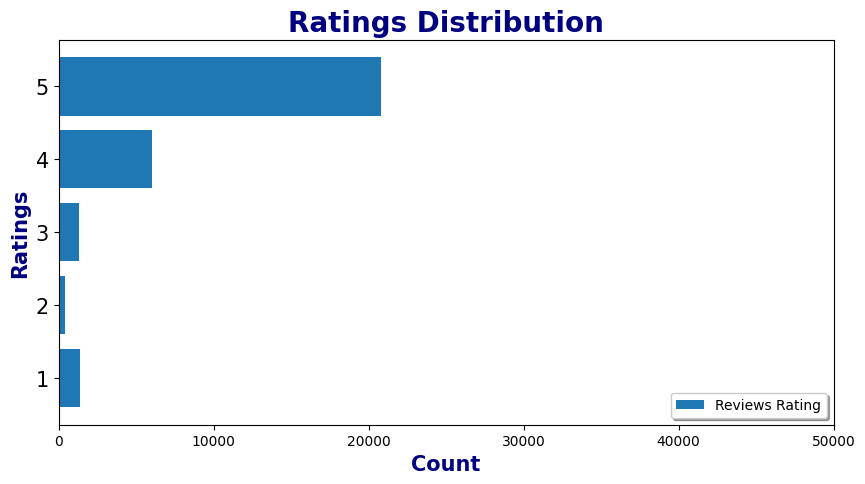

In [10]:
# 📊 Ratings Frequency Plot
plt.figure(figsize=[10, 5])

x = list(df['reviews_rating'].value_counts().index)
y = list(df['reviews_rating'].value_counts())

plt.barh(x, y)

ticks_x = np.linspace(0, 50000, 6)
plt.xticks(ticks_x, fontsize=10, color='black')
plt.yticks(size=15)

plt.title('Ratings Distribution', fontsize=20, weight='bold', color='navy')
plt.xlabel('Count', fontsize=15, weight='bold', color='navy')
plt.ylabel('Ratings', fontsize=15, weight='bold', color='navy')

plt.legend(['Reviews Rating'], shadow=True, loc=4)

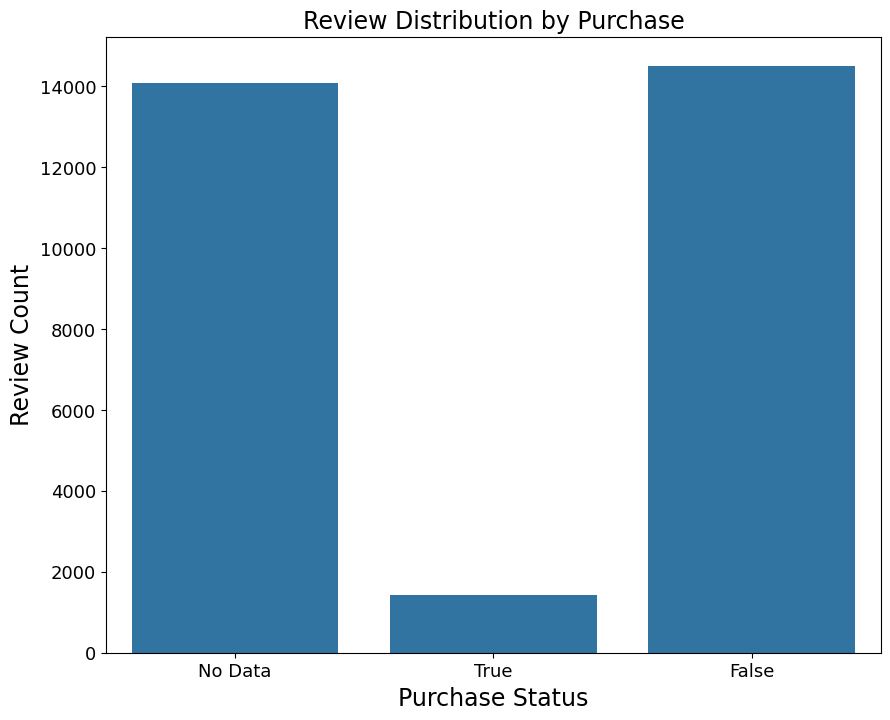

In [11]:
# Fill missing purchase info with 'No Data'
df['reviews_didPurchase'] = df['reviews_didPurchase'].fillna('No Data')

# Plot purchase distribution to check review imbalance
plt.figure(figsize=(10, 8))
ax = sns.countplot(x=df['reviews_didPurchase'])

# Add labels and title
ax.set_xlabel("Purchase Status", fontsize=17)
ax.set_ylabel("Review Count", fontsize=17)
ax.set_title("Review Distribution by Purchase", fontsize=17)
ax.tick_params(labelsize=13)

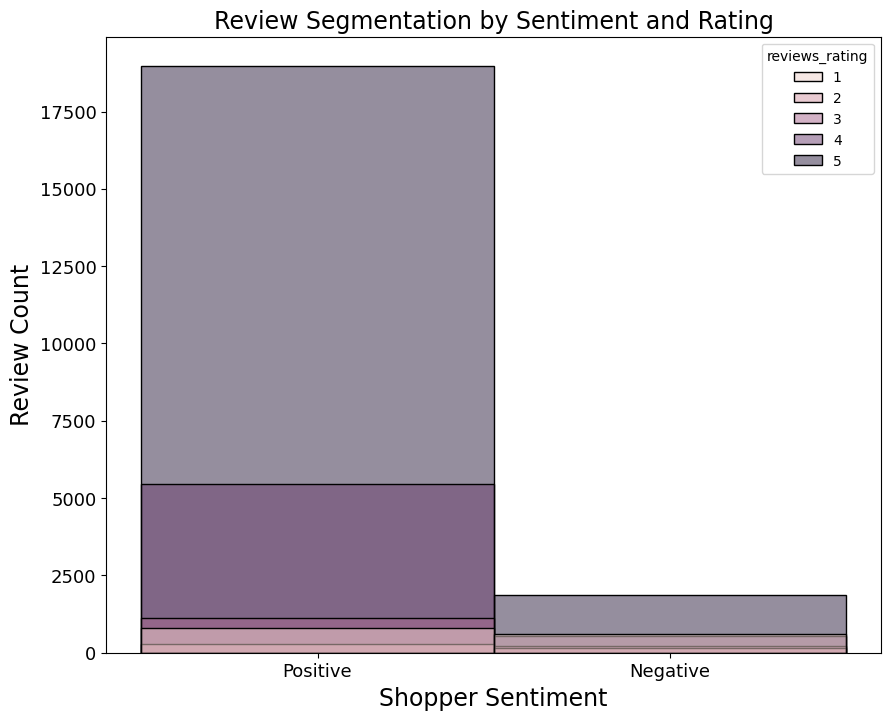

In [12]:
# Setting the figure size for better readability
plt.figure(figsize=(10,8))

# Creating a histogram for 'user_sentiment' with color differentiation based on 'reviews_rating'
ax = sns.histplot(hue=df['reviews_rating'], x=df['user_sentiment'])

# Labeling the x-axis to indicate it shows shopper sentiment
ax.set_xlabel(xlabel="Shopper Sentiment", fontsize=17)

# Labeling the y-axis to show the count of reviews for each sentiment
ax.set_ylabel(ylabel='Review Count', fontsize=17)

# Adding a title to the plot for context
ax.axes.set_title('Review Segmentation by Sentiment and Rating', fontsize=17)

# Adjusting tick labels for better visibility
ax.tick_params(labelsize=13)

In [13]:
# Breakdown of sentiment counts in the 'user_sentiment' column
print(df['user_sentiment'].value_counts())

user_sentiment
Positive    26632
Negative     3367
Name: count, dtype: int64


**From the above graph we can see that there are some rating in the negative sentiment which should be corrected in the Data Cleaning section**

In [14]:
# Download the stopwords from the NLTK library
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

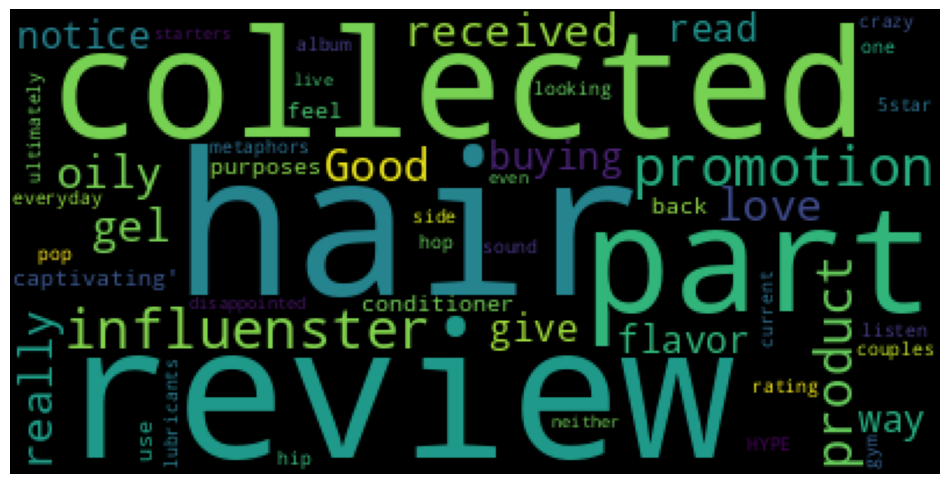

In [15]:
# To Check the most word occurence using word cloud
stoplist = set(stopwords.words('english'))

wordcloud = WordCloud(stopwords=stoplist,max_words=50).generate(str(df['reviews_text']))

print(wordcloud)
fig = plt.figure(figsize=(12,12))  # Increase the figure size for better clarity
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 2.Data Cleaning

In [16]:
# Finding the number of rows with Null values
df.isnull().sum()

,0
id,0
brand,0
categories,0
manufacturer,141
name,0
reviews_date,46
reviews_didPurchase,0
reviews_doRecommend,2570
reviews_rating,0
reviews_text,0


In [17]:
# From the null values, columns reviews_userCity and reviews_userProvince can be dropped
df = df.drop(columns=['reviews_userCity','reviews_userProvince'],axis=1)
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,No Data,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensatio...",Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,walker557,Negative


In [18]:
# Finding the number of rows with Null values
print("shape of the dataframe =",df.shape)
df.isnull().sum()/len(df)

shape of the dataframe = (30000, 13)


,0
id,0.000000
brand,0.000000
categories,0.000000
manufacturer,0.004700
name,0.000000
reviews_date,0.001533
reviews_didPurchase,0.000000
reviews_doRecommend,0.085667
reviews_rating,0.000000
reviews_text,0.000000


In [19]:
# Before Updating the user sentiment columns
df['user_sentiment'].value_counts()

,count
user_sentiment,
Positive,26632
Negative,3367


In [20]:
# For correcting the user sentiment according to rating
def clean_sentiment_review(x):
    if x >= 3:
        return 'Positive'  # If rating is 3 or greater, return 'Positive'
    elif x > 0 and x < 3:
        return 'Negative'  # If rating is greater than 0 but less than 3, return 'Negative'
    else:
        return 'Neutral'  # Optional: Handle zero ratings (if relevant)

In [21]:
# Assign sentiment labels based on review ratings: Positive, Negative, or Neutral
df['user_sentiment'] = df['reviews_rating'].apply(clean_sentiment_review)

# Show the first few rows to confirm the new 'user_sentiment' column was added correctly
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,No Data,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensatio...",Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,walker557,Negative


In [22]:
# User sentiment after the correction
df['user_sentiment'].value_counts()

,count
user_sentiment,
Positive,28196
Negative,1804


## 3.Text Processing

In [23]:
nltk.download('punkt')  # For tokenizing text into words and sentences
nltk.download('stopwords')  # For removing common stopwords
nltk.download('wordnet')  # For lemmatization
nltk.download('omw-1.4')  # For additional resources for lemmatization

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [24]:
# Define the functions needed to perform text processing
def remove_special_characters(text, remove_digits=True):
    """
    Remove special characters (and digits if specified) from text.
    """
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    return re.sub(pattern, '', text)


def to_lowercase(words):
    """
    Convert all words to lowercase.
    """
    return [word.lower() for word in words]


def remove_punctuation_and_splchars(words):
    """
    Remove punctuation and special characters from a list of words.
    """
    cleaned = []
    for word in words:
        word = re.sub(r'[^\w\s]', '', word)
        if word:
            word = remove_special_characters(word, True)
            cleaned.append(word)
    return cleaned


stopword_list = stopwords.words('english')

def remove_stopwords(words):
    """
    Remove common stopwords from the list.
    """
    return [word for word in words if word not in stopword_list]


def stem_words(words):
    """
    Reduce words to their root form using stemming.
    """
    stemmer = LancasterStemmer()
    return [stemmer.stem(word) for word in words]


def lemmatize_verbs(words):
    """
    Convert words to their base verb form (lemmatize).
    """
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word, pos='v') for word in words]


def normalize(words):
    """
    Clean text by lowering case, removing punctuation, and stopwords.
    """
    words = to_lowercase(words)
    words = remove_punctuation_and_splchars(words)
    words = remove_stopwords(words)
    return words


def lemmatize(words):
    """
    Lemmatize a list of words.
    """
    return lemmatize_verbs(words)


def normalize_and_lemmaize(input_text):
    """
    Clean and lemmatize input text.
    Steps: remove special characters, tokenize, normalize, and lemmatize.
    """
    # Remove unwanted characters
    input_text = remove_special_characters(input_text)
    # Split into words
    words = nltk.word_tokenize(input_text)
    # Clean words (lowercase, remove punctuation and stopwords)
    words = normalize(words)
    # Convert to base form
    lemmas = lemmatize(words)
    # Return cleaned sentence
    return ' '.join(lemmas)


In [25]:
# Take the Review comment and user sentiment as dataframe
review_df = df[['reviews_text','user_sentiment']]
review_df.head()

,reviews_text,user_sentiment
0,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Positive
1,Good flavor. This review was collected as part of a promotion.,Positive
2,Good flavor.,Positive
3,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensatio...",Negative
4,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Negative


In [26]:
import nltk
nltk.download('punkt_tab')

# create a new column lemmatized_review using the emmatize_text function
review_df['lemmatized_text'] = review_df['reviews_text'].map(lambda text: normalize_and_lemmaize(text))

review_df.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,reviews_text,user_sentiment,lemmatized_text
0,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Positive,love album good hip hop side current pop sound hype listen everyday gym give star rat way metaphors crazy
1,Good flavor. This review was collected as part of a promotion.,Positive,good flavor review collect part promotion
2,Good flavor.,Positive,good flavor
3,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensatio...",Negative,read review look buy one couple lubricants ultimately disappoint didnt even live review read starters neither boyfriend could notice sort enhance captivate sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captivate sensation expect im disappoint pay much lube wont use could use normal personal lubricant less money less mess
4,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Negative,husband buy gel us gel cause irritation felt like burn skin wouldnt recommend gel


In [27]:
# Replacing the -PRON- with spaces
review_df['lemmatized_text'] = review_df['lemmatized_text'].str.replace('-PRON-','')
review_df.head()

,reviews_text,user_sentiment,lemmatized_text
0,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Positive,love album good hip hop side current pop sound hype listen everyday gym give star rat way metaphors crazy
1,Good flavor. This review was collected as part of a promotion.,Positive,good flavor review collect part promotion
2,Good flavor.,Positive,good flavor
3,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensatio...",Negative,read review look buy one couple lubricants ultimately disappoint didnt even live review read starters neither boyfriend could notice sort enhance captivate sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captivate sensation expect im disappoint pay much lube wont use could use normal personal lubricant less money less mess
4,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Negative,husband buy gel us gel cause irritation felt like burn skin wouldnt recommend gel


In [28]:
# Creating a new DataFrame 'review_new_df' containing only the 'lemmatized_text' and 'user_sentiment' columns
review_new_df = review_df[['lemmatized_text', 'user_sentiment']]

# Display newly created DataFrame to view its contents
review_new_df

,lemmatized_text,user_sentiment
0,love album good hip hop side current pop sound hype listen everyday gym give star rat way metaphors crazy,Positive
1,good flavor review collect part promotion,Positive
2,good flavor,Positive
3,read review look buy one couple lubricants ultimately disappoint didnt even live review read starters neither boyfriend could notice sort enhance captivate sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captivate sensation expect im disappoint pay much lube wont use could use normal personal lubricant less money less mess,Negative
4,husband buy gel us gel cause irritation felt like burn skin wouldnt recommend gel,Negative
...,...,...
29995,get conditioner influenster try im love far oily hair use end hair feel amaze soft mess review collect part promotion,Positive
29996,love receive review purpose influenster leave hair feel fresh smell great,Positive
29997,first love smell product wash hair smooth easy brush receive product influenster test purpose opinions review collect part promotion,Positive
29998,receive influenster never go back anything else normally dont use conditioner hair oily fine make hair feel heavy doesnt get oily day really fantastic plan buy future review collect part promotion,Positive


In [29]:
# Create a full copy of the DataFrame to avoid SettingWithCopyWarning
review_new_df = review_new_df.copy()

# Convert sentiment labels to numeric values for modeling:
# 'Negative' → 0 and 'Positive' → 1
review_new_df['user_sentiment'] = review_new_df['user_sentiment'].map({'Negative': 0, 'Positive': 1})

# Show the first few rows to verify the changes
review_new_df.head()


,lemmatized_text,user_sentiment
0,love album good hip hop side current pop sound hype listen everyday gym give star rat way metaphors crazy,1
1,good flavor review collect part promotion,1
2,good flavor,1
3,read review look buy one couple lubricants ultimately disappoint didnt even live review read starters neither boyfriend could notice sort enhance captivate sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captivate sensation expect im disappoint pay much lube wont use could use normal personal lubricant less money less mess,0
4,husband buy gel us gel cause irritation felt like burn skin wouldnt recommend gel,0


### Dividing the dataset into train and test data and handle the class imbalance

In [30]:
# Splitting the data into training and testing sets (75% for training and 25% for testing)
x_train, x_test, y_train, y_test = train_test_split(
    review_new_df['lemmatized_text'],  # Features (lemmatized review text)
    review_new_df['user_sentiment'],   # Target variable (user sentiment labels)
    train_size=0.75,
    random_state=45,
    stratify=review_new_df['user_sentiment']  # Preserve the sentiment distribution in both sets
)

# Displaying the distribution of sentiment labels in the training set
# This helps to check the class distribution after the split
y_train.value_counts()

,count
user_sentiment,
1,21147
0,1353


# 4. Feature Engineering

In [31]:
# Convert text data to a matrix of token counts
count_vect = CountVectorizer()
x_count = count_vect.fit_transform(x_train)

# Convert token counts to TF-IDF scores
tfidf_transformer = TfidfTransformer()
x_train_transformed = tfidf_transformer.fit_transform(x_count)

# Show the shape of the TF-IDF feature matrix (samples × features)
x_train_transformed.shape

(22500, 14752)

In [32]:
# Save the CountVectorizer to a pickle file
with open(mydrive_path + '/pickle_files/count_vector.pkl', 'wb') as f:
    pickle.dump(count_vect, f)

# Save the TfidfTransformer to a pickle file
with open(mydrive_path + '/pickle_files/tfidf_transformer.pkl', 'wb') as f:
    pickle.dump(tfidf_transformer, f)

print("CountVectorizer and TfidfTransformer have been saved to separate pickle files.")

CountVectorizer and TfidfTransformer have been saved to separate pickle files.


In [33]:
# Checking the distribution of the sentiment labels in the training set before any resampling
count = Counter(y_train)
print('Before sampling:', count)

# Applying SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes in the training set
sampler = SMOTE()

# Resampling the training data (x_train_transformed) and the corresponding sentiment labels (y_train)
x_train_sm, y_train_sm = sampler.fit_resample(x_train_transformed, y_train)

# Checking the distribution of sentiment labels after resampling to confirm balance
count = Counter(y_train_sm)
print('After sampling:', count)

Before sampling: Counter({1: 21147, 0: 1353})
After sampling: Counter({1: 21147, 0: 21147})


# 5. Sentiment Classification

We will train and compare the following models:
 - Logistic Regression
 - Random Forest Classifier
 - Gradient Boosting Classifier
 - Naive Bayes Model
 - XGBClassifier

The best-performing model will be selected after hyperparameter tuning.

In [34]:
# List to store metrics of multiple models
performance = []

# Function to evaluate and print model performance
def model_metrics(y, y_pred, model_name, metrics):
    # Calculate core metrics
    accuracy = accuracy_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_pred)
    precision = precision_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    confusion = confusion_matrix(y, y_pred)

    # Extract values from the confusion matrix
    TP = confusion[1, 1]  # True Positive
    TN = confusion[0, 0]  # True Negative
    FP = confusion[0, 1]  # False Positive
    FN = confusion[1, 0]  # False Negative

    # Calculate sensitivity (recall) and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)

    # Print evaluation summary
    print("*" * 50)
    print("Confusion Matrix:\n", confusion)
    print(f"Sensitivity of {model_name}: {round(sensitivity, 2)}")
    print(f"Specificity of {model_name}: {round(specificity, 2)}")
    print(f"Accuracy Score of {model_name}: {accuracy}")
    print(f"ROC AUC Score of {model_name}: {roc_auc}")
    print("Classification Report:")
    print(classification_report(y, y_pred))
    print("*" * 50)

    # Save results to the list
    metrics.append({
        'Model_name': model_name,
        'Accuracy': accuracy,
        'Roc_auc_score': roc_auc,
        'Precision': precision,
        'F1_score': f1
    })

    return metrics


### 1. Logistic Regression Model

In [74]:
# Train Logistic Regression model on the oversampled training data
lr = LogisticRegression()              # Initialize the model
lr.fit(x_train_sm, y_train_sm)        # Fit the model using resampled data

LogisticRegression()

In [75]:
# We will use the trained Logistic Regression model to make predictions on the resampled training data
y_pred = lr.predict(x_train_sm)

# We will evaluate the model's performance using various metrics through the 'model_metrics' function
# Metrics include accuracy, ROC AUC, precision, F1 score, sensitivity, and specificity
performance = model_metrics(y_train_sm, y_pred, 'Logistic Regression', performance)

**************************************************
Confusion Matrix:
 [[20802   345]
 [  627 20520]]
Sensitivity of Logistic Regression: 0.97
Specificity of Logistic Regression: 0.98
Accuracy Score of Logistic Regression: 0.9770180167399631
ROC AUC Score of Logistic Regression: 0.9770180167399631
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     21147
           1       0.98      0.97      0.98     21147

    accuracy                           0.98     42294
   macro avg       0.98      0.98      0.98     42294
weighted avg       0.98      0.98      0.98     42294

**************************************************


### 2. RandomForest Classifier Model

In [39]:
# We will create a Random Forest Classifier and train it on the resampled training data
rf = RandomForestClassifier()
rf.fit(x_train_sm, y_train_sm)

RandomForestClassifier()

In [40]:
# Predict using the trained Random Forest Classifier model on the resampled training data
y_pred_rf = rf.predict(x_train_sm)

# Evaluate the performance of the Random Forest Classifier model using the 'model_metrics' function
performance = model_metrics(y_train_sm, y_pred_rf, 'RandomForestClassifier', performance)

**************************************************
Confusion Matrix:
 [[21146     1]
 [    2 21145]]
Sensitivity of RandomForestClassifier: 1.0
Specificity of RandomForestClassifier: 1.0
Accuracy Score of RandomForestClassifier: 0.9999290679529012
ROC AUC Score of RandomForestClassifier: 0.999929067952901
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21147
           1       1.00      1.00      1.00     21147

    accuracy                           1.00     42294
   macro avg       1.00      1.00      1.00     42294
weighted avg       1.00      1.00      1.00     42294

**************************************************


### 3. Gradient Bossting Classifier

In [38]:
# Initialize the GradientBoostingClassifier and fit it on the resampled training data (x_train_sm and y_train_sm)
xgba = GradientBoostingClassifier()
xgba.fit(x_train_sm, y_train_sm)

# We will make predictions using the trained Gradient Boosting model on the resampled training data
y_pred_xgb = xgba.predict(x_train_sm)

# Evaluate the performance of the Gradient Boosting Classifier model using the 'model_metrics' function
performance = model_metrics(y_train_sm, y_pred_xgb, 'GradientBoostingClassifier', performance)

**************************************************
Confusion Matrix:
 [[19337  1810]
 [  857 20290]]
Sensitivity of GradientBoostingClassifier: 0.96
Specificity of GradientBoostingClassifier: 0.91
Accuracy Score of GradientBoostingClassifier: 0.9369414101290964
ROC AUC Score of GradientBoostingClassifier: 0.9369414101290964
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94     21147
           1       0.92      0.96      0.94     21147

    accuracy                           0.94     42294
   macro avg       0.94      0.94      0.94     42294
weighted avg       0.94      0.94      0.94     42294

**************************************************


### 4. Naive Bayes Model

In [41]:
# Initializing the Naive Bayes model (MultinomialNB)
mnb = MultinomialNB()

# Fitting the model on the oversampled training data (x_train_sm, y_train_sm)
mnb.fit(x_train_sm, y_train_sm)

# Making predictions on the resampled training data
y_pred_mnb = mnb.predict(x_train_sm)

# Evaluating the performance of the Naive Bayes model using the 'model_metrics' function
# This function calculates various performance metrics like accuracy, ROC AUC, precision, etc.
performance = model_metrics(y_train_sm, y_pred_mnb, 'Naive_Bayes', performance)

**************************************************
Confusion Matrix:
 [[20352   795]
 [ 1584 19563]]
Sensitivity of Naive_Bayes: 0.93
Specificity of Naive_Bayes: 0.96
Accuracy Score of Naive_Bayes: 0.9437508866505887
ROC AUC Score of Naive_Bayes: 0.9437508866505887
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     21147
           1       0.96      0.93      0.94     21147

    accuracy                           0.94     42294
   macro avg       0.94      0.94      0.94     42294
weighted avg       0.94      0.94      0.94     42294

**************************************************


### 5. XGBoostClassifier


In [42]:
# Initialize the XGBoost classifier and fit it on the resampled training data
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train_sm, y_train_sm)

# Make predictions using the trained XGBoost model
y_pred_xgbc = xgb_classifier.predict(x_train_sm)

# Evaluate the performance of the XGBoost model using the 'model_metrics' function
performance = model_metrics(y_train_sm, y_pred_xgbc, 'XGBClassifier', performance)


**************************************************
Confusion Matrix:
 [[20801   346]
 [  119 21028]]
Sensitivity of XGBClassifier: 0.99
Specificity of XGBClassifier: 0.98
Accuracy Score of XGBClassifier: 0.9890055326996737
ROC AUC Score of XGBClassifier: 0.9890055326996736
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     21147
           1       0.98      0.99      0.99     21147

    accuracy                           0.99     42294
   macro avg       0.99      0.99      0.99     42294
weighted avg       0.99      0.99      0.99     42294

**************************************************


In [43]:
# Convert the list of model performance metrics into a DataFrame
metrics_df = pd.DataFrame(performance)

# Display the model performance summary
metrics_df

,Model_name,Accuracy,Roc_auc_score,Precision,F1_score
0,RandomForestClassifier with hyperparameter,0.909491,0.909491,0.865179,0.914668
1,GradientBoostingClassifier,0.936941,0.936941,0.918100,0.938331
2,RandomForestClassifier,0.999929,0.999929,0.999953,0.999929
3,Naive_Bayes,0.943751,0.943751,0.960949,0.942682
4,XGBClassifier,0.989006,0.989006,0.983812,0.989064


## Hyperparameter Tuning of models

In [46]:
# Define hyperparameters for tuning the RandomForestClassifier using GridSearchCV
n_estimators = [200, 400, 600]           # Number of trees in the forest
max_depth = [6, 10, 15]                  # Maximum depth of each tree
min_samples_leaf = [5, 6, 8]             # Minimum samples required at a leaf node
criterion = ['gini', 'entropy']          # Splitting criteria

# Create a dictionary of hyperparameter options for grid search
params = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'criterion': criterion
}

In [47]:
# Perform Grid Search Cross Validation o tune Random Forest hyperparameters
grid_cv = GridSearchCV(
    estimator=rf,
    param_grid=params,
    n_jobs=-1,
    scoring='roc_auc',
    verbose=1,
    cv = 3
)

In [48]:
# Fit the model using GridSearchCV with the resampled training data
grid_cv.fit(x_train_sm, y_train_sm)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 10, 15],
                         'min_samples_leaf': [5, 6, 8],
                         'n_estimators': [200, 400, 600]},
             scoring='roc_auc', verbose=1)

In [49]:
# Retrieve the best Random Forest model from GridSearchCV after hyperparameter tuning
rf_final = grid_cv.best_estimator_
rf_final

RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=400)

In [50]:
# Saving the final trained Random Forest model (rf_final) using pickle
pickle.dump(rf_final, open(mydrive_path + '/pickle_files/RandomForest_classifier.pkl', 'wb'))

In [51]:
# Display the best ROC AUC score obtained during GridSearchCV
grid_cv.best_score_

np.float64(0.9776833517412339)

In [35]:
# Load best trained Random Forest from previous run
rf_final_path = mydrive_path + '/pickle_files/RandomForest_classifier.pkl'

with open(rf_final_path, 'rb') as f:
    rf_final = pickle.load(f)

# Making predictions using the final trained Random Forest Classifier model (rf_final) after hyperparameter tuning
y_pred_rfgcv = rf_final.predict(x_train_sm)
# Evaluate the tuned Random Forest Classifier model's performance on training data
performance = model_metrics(y_train_sm, y_pred_rfgcv, 'RandomForestClassifier with hyperparameter', performance)

**************************************************
Confusion Matrix:
 [[17950  3197]
 [  631 20516]]
Sensitivity of RandomForestClassifier with hyperparameter: 0.97
Specificity of RandomForestClassifier with hyperparameter: 0.85
Accuracy Score of RandomForestClassifier with hyperparameter: 0.9094907079018301
ROC AUC Score of RandomForestClassifier with hyperparameter: 0.9094907079018301
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.90     21147
           1       0.87      0.97      0.91     21147

    accuracy                           0.91     42294
   macro avg       0.92      0.91      0.91     42294
weighted avg       0.92      0.91      0.91     42294

**************************************************


In [48]:
n_estimators = [200, 400, 600]  # List of n_estimators to test
params_1 = {'n_estimators': n_estimators}  # Define the hyperparameter grid

In [49]:
# Perform Grid Search Cross Validation to tune Gradient Boosting Classifier
grid_cv_boost = GridSearchCV(
    estimator=xgba,
    param_grid=params_1,
    n_jobs=-1,
    scoring='roc_auc',
    verbose=1,
    cv=3
)

In [57]:
# Fit GridSearchCV for Gradient Boosting and display the best ROC AUC score
# grid_cv_boost.fit(x_train_sm, y_train_sm)

# Import packages
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
import time

# Define the parameter values to test
n_estimators_list = [100, 200, 300]
results = []

# Loop over each parameter value and train
best_score = 0
best_model = None
best_params = {}

for n in n_estimators_list:
    print(f"\nTraining with n_estimators = {n}")

    model = XGBClassifier(
        n_estimators=n,
        use_label_encoder=False,
        eval_metric='auc',
        tree_method='hist',
        n_jobs=-1,
        random_state=42
    )

    start = time.time()
    model.fit(
        x_train_sm, y_train_sm,
        eval_set=[(x_train_sm, y_train_sm)],
        verbose=False
    )
    end = time.time()

    # Predict and score
    y_pred = model.predict_proba(x_train_sm)[:, 1]
    score = roc_auc_score(y_train_sm, y_pred)
    print(f"ROC AUC: {score:.4f} (trained in {end - start:.1f}s)")

    # Save result
    results.append({'n_estimators': n, 'roc_auc': score})

    # Track best model
    if score > best_score:
        best_score = score
        best_model = model
        best_params = {'n_estimators': n}

print('Best score for GradientBoosting =', best_score)


Training with n_estimators = 100
ROC AUC: 0.9994 (trained in 29.1s)

Training with n_estimators = 200
ROC AUC: 0.9998 (trained in 49.3s)

Training with n_estimators = 300
ROC AUC: 1.0000 (trained in 67.9s)
Best score for GradientBoosting = 0.9999516285500917


In [62]:
xgb_final=best_model

# Saving the final trained Gradient Boosting model (rf_final) using pickle
pickle.dump(best_model, open(mydrive_path + '/checkpoints/xgb_best_model.pkl', 'wb'))

In [63]:
# Evaluate the final tuned Gradient Boosting Classifier on the training data
# Make predictions using the tuned Gradient Boosting model
y_pred_xgbgcv = xgb_final.predict(x_train_sm)

# Evaluate model performance using key metrics
performance = model_metrics(
    y_train_sm,
    y_pred_xgbgcv,
    'GradientBoostingClassifier with n = 600',
    performance
)

**************************************************
Confusion Matrix:
 [[21034   113]
 [   10 21137]]
Sensitivity of GradientBoostingClassifier with n = 600: 1.0
Specificity of GradientBoostingClassifier with n = 600: 0.99
Accuracy Score of GradientBoostingClassifier with n = 600: 0.997091786068946
ROC AUC Score of GradientBoostingClassifier with n = 600: 0.9970917860689459
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     21147
           1       0.99      1.00      1.00     21147

    accuracy                           1.00     42294
   macro avg       1.00      1.00      1.00     42294
weighted avg       1.00      1.00      1.00     42294

**************************************************


In [64]:
# Perform Grid Search to tune 'max_depth' for the final trained XGBoost model

max_depth = [5, 6, 7, 10]
params_2 = {'max_depth': max_depth}

grid_cv_boost2 = GridSearchCV(
    estimator=xgb_final,
    param_grid=params_2,
    n_jobs=-1,
    scoring='roc_auc',
    verbose=1,
    cv=3,                     # Reduce cross-validation folds to speed up
    refit=False               # Prevent the model from being refitted after the grid search
)

In [65]:
# Fit GridSearchCV to optimize 'max_depth' for the XGBoost model
grid_cv_boost2.fit(x_train_sm, y_train_sm)

# Print the best ROC AUC score found during the grid search
print('Best score for GradientBoosting =', grid_cv_boost2.best_score_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best score for GradientBoosting = 0.9974519573156183


In [66]:
best_params = grid_cv_boost2.best_params_
xgb_best = xgb_final.set_params(**best_params)
print(xgb_best)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)


In [67]:
# Extract best parameters from the previous grid search
best_params_depth = grid_cv_boost2.best_params_

# Update the base model (xgb_final) with these best parameters
updated_model = xgb_final.set_params(**best_params_depth)

#  Define the new parameter grid to tune 'min_samples_split'
min_samples_split = [10, 20, 30]
params_2 = {'min_samples_split': min_samples_split}

# Create a new GridSearchCV using the updated model
grid_cv_boost3 = GridSearchCV(
    estimator=updated_model,
    param_grid=params_2,
    n_jobs=-1,
    scoring='roc_auc',
    verbose=1,
    cv=3                 # Reduce cross-validation folds to speed up
)

# Fit the model
grid_cv_boost3.fit(x_train_sm, y_train_sm)

print('Best score for GradientBoosting =', grid_cv_boost3.best_score_)
print('Best params:', grid_cv_boost3.best_params_)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best score for GradientBoosting = 0.9974519573156183
Best params: {'min_samples_split': 10}


In [68]:
# Creating and displaying a DataFrame with performance metrics for all evaluated models
metrics_df = pd.DataFrame(performance)
metrics_df

,Model_name,Accuracy,Roc_auc_score,Precision,F1_score
0,RandomForestClassifier with hyperparameter,0.909491,0.909491,0.865179,0.914668
1,GradientBoostingClassifier,0.936941,0.936941,0.918100,0.938331
2,RandomForestClassifier,0.999929,0.999929,0.999953,0.999929
3,Naive_Bayes,0.943751,0.943751,0.960949,0.942682
4,XGBClassifier,0.989006,0.989006,0.983812,0.989064
5,GradientBoostingClassifier with n = 600,0.997092,0.997092,0.994682,0.997099


In [76]:
rf_final = pickle.load(open(mydrive_path+'/pickle_files/RandomForest_classifier.pkl','rb'))

In [70]:
# Defining the final Gradient Boosting Classifier model with the optimal hyperparameters
final_model = GradientBoostingClassifier(
    max_depth=10,
    min_samples_split=20,
    n_estimators=600
)

In [71]:
final_model.fit(x_train_sm,y_train_sm)

GradientBoostingClassifier(max_depth=10, min_samples_split=20, n_estimators=600)

In [72]:
# Saving the final trained model to a file using pickle
pickle.dump(final_model, open(mydrive_path + '/pickle_files/final_model.pkl', 'wb'))

In [77]:
# Evaluate the performance of all trained models on the test data

# Initialize an empty list to store the performance of each model on the test data
test_performance = []

# Transform the test data using the trained vectorizer and TF-IDF transformer
test_word_vect = count_vect.transform(x_test)
test_tfidf_vect = tfidf_transformer.transform(test_word_vect)

# Predict and evaluate the performance of Logistic Regression on the test data
y_test_pred_lr = lr.predict(test_tfidf_vect)
test_performance = model_metrics(y_test, y_test_pred_lr, 'Logistic Regression', test_performance)

# Predict and evaluate the performance of XGBoost Classifier on the test data
y_test_pred_xgbc = xgb_classifier.predict(test_tfidf_vect)
test_performance = model_metrics(y_test, y_test_pred_xgbc, 'XGBoost Classifier', test_performance)

# Predict and evaluate the performance of the Tuned RandomForestClassifier on the test data
y_test_pred_rf = rf_final.predict(test_tfidf_vect)
test_performance = model_metrics(y_test, y_test_pred_rf, 'Tuned RandomForestClassifier', test_performance)

# Predict and evaluate the performance of the Tuned GradientBoostingClassifier on the test data
y_test_pred_xgb = final_model.predict(test_tfidf_vect)
test_performance = model_metrics(y_test, y_test_pred_xgb, 'Tuned GradientBoostClassifier', test_performance)

# Create a DataFrame to display the performance metrics for all models on the test data
test_metrics_df = pd.DataFrame(test_performance)

# Display the performance metrics
test_metrics_df

**************************************************
Confusion Matrix:
 [[ 348  103]
 [ 266 6783]]
Sensitivity of Logistic Regression: 0.96
Specificity of Logistic Regression: 0.77
Accuracy Score of Logistic Regression: 0.9508
ROC AUC Score of Logistic Regression: 0.866941388110279
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.77      0.65       451
           1       0.99      0.96      0.97      7049

    accuracy                           0.95      7500
   macro avg       0.78      0.87      0.81      7500
weighted avg       0.96      0.95      0.95      7500

**************************************************
**************************************************
Confusion Matrix:
 [[ 297  154]
 [ 100 6949]]
Sensitivity of XGBoost Classifier: 0.99
Specificity of XGBoost Classifier: 0.66
Accuracy Score of XGBoost Classifier: 0.9661333333333333
ROC AUC Score of XGBoost Classifier: 0.8221750879730387
Classification Report:
     

,Model_name,Accuracy,Roc_auc_score,Precision,F1_score
0,Logistic Regression,0.950800,0.866941,0.985042,0.973520
1,XGBoost Classifier,0.966133,0.822175,0.978319,0.982052
2,Tuned RandomForestClassifier,0.946000,0.787597,0.974707,0.971168
3,Tuned GradientBoostClassifier,0.969467,0.821873,0.978127,0.983852


### **Conclusion:**
- **Logistic Regression** stands out as the top model based on several key metrics such as **ROC AUC**, **accuracy**, and **precision**, making it the optimal choice for this dataset. Its simplicity and interpretability further enhance its appeal.
- While **XGBoost** and **Gradient Bossting** offer strong predictive capabilities, their complexity and risk of overfitting make **Logistic Regression** a more dependable and efficient model in this case.

Given **Logistic Regression**’s consistent performance, it is the preferred model for deployment or further refinement.

In [78]:
# Saving the trained Logistic Regression model to a pickle file for future use
pickle.dump(lr, open(mydrive_path + '/pickle_files/model.pkl', 'wb'))

# 6. Recommendation Engine

In [80]:
# Read the dataset and display a random sample of 5 rows
df = pd.read_csv(mydrive_path + '/data/sample30.csv')
df.sample(5)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
2756,AVpe59io1cnluZ0-ZgDU,Universal Home Video,"Movies, Music & Books,Movies,Comedy,Movies & TV Shows,Instawatch Movies By VUDU,Shop Instawatch,Movies & TV,Ways To Shop Entertainment,Movies & Tv On Blu-Ray,Movies & Music,Instawatch,Blu-ray",Universal,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),2016-12-03T00:00:00.000Z,NaN,True,4,Just as funny as the first!! Hoping there will be a third!,Funny,NaN,NaN,giggles,Positive
26689,AVpfPPkEilAPnD_xX3cP,Aveeno,"Personal Care,Sun Care,Featured Brands,Health & Beauty,Johnson & Johnson Beauty,Johnson & Johnson,Beauty,Skin Care,Sun & Tanning,Health,Beauty & Personal Care,Sunscreens & Tanning Products,Sunscreens,Facial Sunscreens,Sun Protection & Tanning,Sunscreen,Body Sunscreens,Health & Wellness,Sun Protection,Skincare",Aveeno Baby,"Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",2016-05-24T00:00:00.000Z,NaN,NaN,5,No Issues!! prompt delivery. Use it everyday,Five Stars,NaN,NaN,byamazon customer,Negative
20630,AVpf-k78LJeJML43G4qN,Metzeler,"Auto & Tires,Motorcycle and ATV,Motorcycle,Motorcycle Parts,Motorcycle Tires,Cruiser,Tire Tubes",Parts,Metzeler ME888 Marathon Ultra Custom Touring Front Tire 100/90-19,2015-10-06T03:13:00Z,NaN,NaN,5,Great Prices and fast shipping rates. The fuel gauge/sending unit doesn't work correctly.,NaN,NaN,NaN,shane rebert,Positive
1017,AV1YGDqsGV-KLJ3adc-O,Windex,"Household Essentials,Cleaning Supplies,Glass Cleaners,Health & Household,Household Supplies,Household Cleaning,Featured Brands,Home And Storage & Org,Thanksgathering,All-purpose Cleaners,Target Restock,Food & Grocery,Glass & Window",Windex,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),2014-10-30T00:00:00.000Z,False,True,5,"I use windex every week and love the product! I use it on mirrors, windows, counter tops, etc. It works everywhere! This review was collected as part of a promotion.",Great Product!,NaN,NaN,becky b,Positive
26419,AVpfPnrU1cnluZ0-g9rL,Lionsgate,"Movies, Music & Books,Movies,Sci-Fi & Fantasy,Movies & TV,Instawatch Movies By VUDU,Shop Instawatch,Ultimate Editions,DTS,Movies & Music,Movies & TV Shows",Lions Gate,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),2015-02-25T00:00:00.000Z,NaN,True,5,"If you liked the television series, you should like this movie that started it all. Kurt Russell is his usual hard-nosed character and James Spader (in his youthful long-hair days) is quite different than his characters in ""Boston Legal"" or ""Blacklist""!",This is the movie that started the long-running tV,NaN,NaN,retiredattorney,Positive


In [81]:
len(df['name'].unique())

271

In [123]:
# Split the dataset into training and testing sets (70% training, 30% testing)
train, test = train_test_split(df, train_size=0.70, random_state=45)

# Display the shape of the training and testing sets
print('Train shape = ', train.shape)
print('Test shape = ', test.shape)

Train shape =  (21000, 15)
Test shape =  (9000, 15)


In [83]:
# Create a pivot table to aggregate 'reviews_rating' for each 'reviews_username' and 'name'
train_pivot = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',
                            data=train).fillna(1)

# Display the resulting pivot table
train_pivot

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
06stidriver,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuttle,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
zwithanx,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
zxcsdfd,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [84]:
# Creating the train dataset for prediction and evaluation
train_pivot1 = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating', data=train).fillna(1)

In [85]:
train_pivot1.loc['piggyboy420']

,piggyboy420
name,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0
100:Complete First Season (blu-Ray),1.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,1.0
"2x Ultra Era with Oxi Booster, 50fl oz",1.0
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",1.0
...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",1.0
Weleda Everon Lip Balm,1.0
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),1.0


In [86]:
def cosine_similarity(df):
    """
    Calculates adjusted cosine similarity between users.
    """
    mean_df = np.nanmean(df, axis=1)
    substracted_df = (df.T - mean_df).T
    user_correlation = 1 - pairwise_distances(substracted_df.fillna(0), metric='cosine')
    user_correlation[np.isnan(user_correlation)] = 0
    return user_correlation, substracted_df

In [87]:
# Calculate the user-user similarity matrix using adjusted cosine similarity
user_corr_matrix, normalized_df = cosine_similarity(train_pivot1)

# Display the cosine similarity matrix between users
user_corr_matrix

array([[ 1.        , -0.00395257, -0.00395257, ..., -0.00395257,
        -0.00395257,  1.        ],
       [-0.00395257,  1.        ,  1.        , ..., -0.00395257,
        -0.00395257, -0.00395257],
       [-0.00395257,  1.        ,  1.        , ..., -0.00395257,
        -0.00395257, -0.00395257],
       ...,
       [-0.00395257, -0.00395257, -0.00395257, ...,  1.        ,
         1.        , -0.00395257],
       [-0.00395257, -0.00395257, -0.00395257, ...,  1.        ,
         1.        , -0.00395257],
       [ 1.        , -0.00395257, -0.00395257, ..., -0.00395257,
        -0.00395257,  1.        ]])

In [88]:
user_corr_matrix[user_corr_matrix < 0] = 0
user_corr_matrix.shape

(18205, 18205)

In [89]:
df[df['reviews_username'] == 'zzz1127']

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
7256,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2014-12-03T00:00:00.000Z,False,True,4,These wipes are very handy for getting your cleaning done quickly. I keep them in the bathroom and use them to wipe down all surface areas for a quick 10 minute cleaning. Keep it up every week and it's that easy to maintain a clean room. This review was collected as part of a promotion.,Handy Wipes for Quick Cleaning,NaN,NaN,zzz1127,Positive


In [90]:
# Using the user correlation matrix to predict ratings
user_pred_ratings = np.dot(user_corr_matrix, train_pivot1.fillna(0))
# Displaying the predicted ratings matrix
user_pred_ratings

array([[ 437.75576386,  438.26995035,  437.75576386, ...,  443.40142748,
         440.05601875,  437.75576386],
       [2120.11694472, 2138.77377911, 2120.11694472, ..., 2132.78849166,
        2120.11694472, 2121.98528539],
       [2120.11694472, 2138.77377911, 2120.11694472, ..., 2132.78849166,
        2120.11694472, 2121.98528539],
       ...,
       [5461.34652523, 5465.56431548, 5461.34652523, ..., 5467.89333212,
        5464.16935704, 5461.34652523],
       [5461.34652523, 5465.56431548, 5461.34652523, ..., 5467.89333212,
        5464.16935704, 5461.34652523],
       [ 437.75576386,  438.26995035,  437.75576386, ...,  443.40142748,
         440.05601875,  437.75576386]])

In [91]:
user_pred_ratings.shape

(18205, 254)

In [94]:
user_final_rating = np.multiply(user_pred_ratings,train_pivot)
user_final_rating

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,437.755764,438.269950,437.755764,437.755764,440.056019,437.755764,437.755764,437.755764,437.755764,441.303557,...,437.755764,437.755764,437.755764,437.755764,438.873393,437.755764,437.755764,443.401427,440.056019,437.755764
02dakota,2120.116945,2138.773779,2120.116945,2120.116945,2120.116945,2120.116945,2120.116945,2120.116945,2120.116945,2133.045416,...,2120.116945,2120.116945,2121.985285,2120.116945,2122.191680,2120.116945,2120.116945,2132.788492,2120.116945,2121.985285
02deuce,2120.116945,2138.773779,2120.116945,2120.116945,2120.116945,2120.116945,2120.116945,2120.116945,2120.116945,2133.045416,...,2120.116945,2120.116945,2121.985285,2120.116945,2122.191680,2120.116945,2120.116945,2132.788492,2120.116945,2121.985285
0325home,5461.346525,5465.564315,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5465.138556,...,5469.987314,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5467.893332,5464.169357,5461.346525
06stidriver,5461.346525,5465.564315,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5465.138556,...,5469.987314,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5467.893332,5464.169357,5461.346525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuttle,456.106425,458.597546,456.106425,456.106425,456.106425,456.106425,456.106425,456.106425,456.106425,461.356739,...,457.883951,456.106425,456.106425,456.106425,456.106425,456.106425,456.106425,459.712962,456.106425,456.106425
zwithanx,5461.346525,5465.564315,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5465.138556,...,5469.987314,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5467.893332,5464.169357,5461.346525
zxcsdfd,5461.346525,5465.564315,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5465.138556,...,5469.987314,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5467.893332,5464.169357,5461.346525


In [95]:
# Save the predicted user-item ratings to a pickle file for reuse
pickle.dump(user_final_rating, open(mydrive_path + '/pickle_files/user_final_rating.pkl', 'wb'))

In [96]:
# Get top 20 highest-rated product recommendations for user 'piggyboy420'
user_final_rating.loc['piggyboy420'].sort_values(ascending=False).head(20)

,piggyboy420
name,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,0.0
100:Complete First Season (blu-Ray),0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0
5302050 15/16 FCT/HOSE ADAPTOR,0.0
Africa's Best No-Lye Dual Conditioning Relaxer System Super,0.0
Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,0.0


### Evaluation for user - user recommendation system

In [97]:
# Find users present in both train and test datasets
common = test[test.reviews_username.isin(train.reviews_username)]
# Show the number of common user entries
common.shape

(2006, 15)

In [98]:
corr_df = pd.DataFrame(user_corr_matrix)
corr_df

,0,1,2,3,4,5,6,7,8,9,...,18195,18196,18197,18198,18199,18200,18201,18202,18203,18204
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
18201,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
18202,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
18203,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [99]:
# Add user names from the normalized ratings index to the correlation DataFrame
corr_df['user_name'] = normalized_df.index

# Set user names as the index for easier access and clarity
corr_df.set_index('user_name', inplace=True)

# View the updated correlation DataFrame
corr_df

,0,1,2,3,4,5,6,7,8,9,...,18195,18196,18197,18198,18199,18200,18201,18202,18203,18204
user_name,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
02dakota,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
06stidriver,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuttle,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
zwithanx,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
zxcsdfd,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [100]:
list_name = common.reviews_username.tolist()

corr_df.columns = normalized_df.index.tolist()
corr_df.columns

Index(['00sab00', '02dakota', '02deuce', '0325home', '06stidriver', '1.11E+24',
       '1085', '10ten', '11111111aaaaaaaaaaaaaaaaa', '11677j',
       ...
       'zowie', 'zozo0o', 'zsazsa', 'zt313', 'zubb', 'zuttle', 'zwithanx',
       'zxcsdfd', 'zyiah4', 'zzdiane'],
      dtype='object', length=18205)

In [101]:
corr_df1 = corr_df[corr_df.index.isin(list_name)]
corr_df1.shape

(1687, 18205)

In [102]:
corr_df2 = corr_df1.T[corr_df1.T.index.isin(list_name)]
corr_df3 = corr_df2.T
corr_df3.head()

,1234,123charlie,143st,1943,4cloroxl,50cal,7inthenest,aac06002,aaron,abby,...,yeya,ygtz,yohnie1,yshan,yucky111,yummy,yvonne,zburt5,zebras,zippy
user_name,,,,,,,,,,,,,,,,,,,,,
1234,1.000000,0.684558,0.0,0.223114,0.0,0.511718,0.0,0.0,0.837534,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.278697
123charlie,0.684558,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.656818,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
143st,0.000000,0.000000,1.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1943,0.223114,0.000000,0.0,1.000000,0.0,0.444381,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.242522
4cloroxl,0.000000,0.000000,0.0,0.000000,1.0,0.000000,1.0,0.0,0.000000,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000


In [103]:
# Create a pivot table for users common to both train and test sets
common_user_tb = pd.pivot_table(
    data=common,
    index='reviews_username',
    columns='name',
    values='reviews_rating'
)

# Display the pivot table
common_user_tb

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,...,Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143st,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4cloroxl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yummy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yvonne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zburt5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
# Set negative correlation values to 0 to avoid using negative similarity in predictions
corr_df3[corr_df3 < 0] = 0

# Predict ratings for common users using dot product of similarity matrix and user-item matrix
# NaNs in the ratings matrix are treated as 0 during prediction
common_user_rating = np.dot(corr_df3, common_user_tb.fillna(0))

# Display predicted ratings for common users
common_user_rating

array([[7.4987797 , 1.20864234, 0.        , ..., 7.64092148, 0.92858292,
        0.        ],
       [1.74826633, 0.        , 0.        , ..., 3.36140237, 0.        ,
        0.        ],
       [5.67106405, 5.        , 0.        , ..., 5.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.87531862, 0.        , 0.        , ..., 6.10152667, 0.        ,
        0.        ],
       [6.79815093, 1.31072544, 1.07870809, ..., 5.89883029, 1.01174853,
        0.        ]])

In [105]:
# Convert ratings for common users into binary format:
# Ratings >= 1 become 1 (positive feedback), else 0 (negative or no feedback)
dummy_test = common.copy()
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x >= 1 else 0)

# Create a pivot table of binary ratings (0/1) with users as rows and products as columns
dummy_test = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',
                            data=dummy_test).fillna(0)

# Display the binary user-item matrix
dummy_test

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,...,Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143st,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4cloroxl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yummy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yvonne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zburt5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
# Mask predicted ratings using actual test interactions:
# Only retain predicted ratings for items where the user has provided a rating (interaction).
common_user_pred_ratings = np.multiply(common_user_rating, dummy_test)

# Display the masked predicted ratings matrix for common users
common_user_pred_ratings

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,...,Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143st,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,68.109936,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4cloroxl,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yummy,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yvonne,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zburt5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

# Make a copy of the predicted ratings for common users
X = common_user_pred_ratings.copy()

# Filter out the zero values to focus on the positive predicted ratings (since ratings = 0 are not useful in this case)
X = X[X > 0]

# Initialize a MinMaxScaler to scale the values between the range of 1 and 5 (as typical rating systems use a 1-5 scale)
scaler = MinMaxScaler(feature_range=(1, 5))

# Fit the scaler on the non-zero predicted ratings and transform the data to scale the values
print(scaler.fit(X))

# Apply the scaling transformation to the data
y = scaler.transform(X)

# Display the scaled ratings
print(y)

y.shape

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


(1687, 120)

In [108]:
total_non_nan = np.count_nonzero(~np.isnan(y))

common_pivot = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=common)
common_pivot

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,...,Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143st,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4cloroxl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yummy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yvonne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zburt5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
rmse = (sum(sum((common_pivot -  y )**2))/total_non_nan)**0.5
print(rmse)

1.8755890184650454


### Item - Item recommendation system

In [110]:
train_pivot_ii = train_pivot1.T
train_pivot_ii

reviews_username,00sab00,02dakota,02deuce,0325home,06stidriver,1.11E+24,1085,10ten,11111111aaaaaaaaaaaaaaaaa,11677j,...,zowie,zozo0o,zsazsa,zt313,zubb,zuttle,zwithanx,zxcsdfd,zyiah4,zzdiane
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
100:Complete First Season (blu-Ray),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"2x Ultra Era with Oxi Booster, 50fl oz",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Weleda Everon Lip Balm,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [111]:
item_corr_matrix, normalized_item_df = cosine_similarity(train_pivot_ii)
item_corr_matrix.shape

(254, 254)

In [118]:
# Predict item-based ratings by computing the dot product of user-item ratings and the item-item similarity matrix.
# Each user's rating for an item is estimated as a weighted sum of their ratings for similar items.

# Transpose the user-item matrix so items are rows and users are columns
# Then multiply with the item-item similarity matrix to get predicted ratings
item_pred_rating = np.dot((train_pivot_ii.fillna(0)).T, item_corr_matrix)

# Clip any negative predicted ratings to 0, since ratings cannot be negative
item_pred_rating[item_pred_rating < 0] = 0

# Display the predicted ratings matrix (users × items)
item_pred_rating

array([[1.04268435, 0.82942606, 0.90407857, ..., 0.8340146 , 0.81433002,
        0.79418324],
       [1.02447686, 0.82044582, 0.89224956, ..., 0.75605699, 0.74593788,
        0.77182255],
       [1.03032533, 0.82731907, 0.89604918, ..., 0.7795106 , 0.76225108,
        0.78034392],
       ...,
       [1.00512388, 0.6688738 , 0.87967635, ..., 0.59972721, 0.70334103,
        0.70927094],
       [1.00512388, 0.6688738 , 0.87967635, ..., 0.59972721, 0.70334103,
        0.70927094],
       [1.03749796, 0.8109133 , 0.90070908, ..., 0.81815776, 0.81746936,
        0.78245846]])

In [119]:
#final rating for items
item_final_rating = np.multiply(item_pred_rating,train_pivot)
item_final_rating

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.042684,0.829426,0.904079,0.865297,1.257602,0.864404,0.932152,0.904079,0.904079,0.776925,...,0.629687,0.904079,0.948084,0.932152,0.987044,0.786945,0.874076,0.834015,0.814330,0.794183
02dakota,1.024477,0.820446,0.892250,0.848678,1.146304,0.847674,0.923788,0.892250,0.892250,0.739312,...,0.566040,0.892250,0.999030,0.923788,0.998108,0.760634,0.858542,0.756057,0.745938,0.771823
02deuce,1.030325,0.827319,0.896049,0.854016,1.148991,0.853048,0.926475,0.896049,0.896049,0.748478,...,0.586484,0.896049,0.987127,0.926475,0.988945,0.769085,0.863532,0.779511,0.762251,0.780344
0325home,1.005124,0.668874,0.879676,0.831013,1.137414,0.829892,0.914898,0.879676,0.879676,0.599313,...,0.527652,0.879676,0.923927,0.914898,0.927441,0.732668,0.842030,0.599727,0.703341,0.709271
06stidriver,1.005124,0.668874,0.879676,0.831013,1.137414,0.829892,0.914898,0.879676,0.879676,0.599313,...,0.527652,0.879676,0.923927,0.914898,0.927441,0.732668,0.842030,0.599727,0.703341,0.709271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuttle,1.037404,0.821633,0.900648,0.860477,1.152243,0.859552,0.929727,0.900648,0.900648,0.779304,...,0.624816,0.900648,0.944688,0.929727,0.953126,0.779314,0.869571,0.812825,0.781995,0.782245
zwithanx,1.005124,0.668874,0.879676,0.831013,1.137414,0.829892,0.914898,0.879676,0.879676,0.599313,...,0.527652,0.879676,0.923927,0.914898,0.927441,0.732668,0.842030,0.599727,0.703341,0.709271
zxcsdfd,1.005124,0.668874,0.879676,0.831013,1.137414,0.829892,0.914898,0.879676,0.879676,0.599313,...,0.527652,0.879676,0.923927,0.914898,0.927441,0.732668,0.842030,0.599727,0.703341,0.709271


In [120]:
# Get top 20 item recommendations for user 'piggyboy420' by sorting predicted ratings in descending order
item_final_rating.loc['piggyboy420'].sort_values(ascending=False).head(20)

,piggyboy420
name,
Cantu Coconut Milk Shine Hold Mist - 8oz,2.320392
"Newman's Own Organics Licorice Twist, Black 5oz",2.306636
Sea Gull Lighting Six Light Bath Sconce/vanity - Brushed Nickel,2.264279
Naturtint Nutrideep Multiplier Protective Cream,2.258941
Pink Friday: Roman Reloaded Re-Up (w/dvd),2.182178
"Smead174 Recycled Letter Size Manila File Backs W/prong Fasteners, 2 Capacity, 100/box",2.182178
Chips Deluxe Soft 'n Chewy Cookies,2.072777
Home Health Hairever Shampoo,1.837045
"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",1.789204


### Evaluation for item and item

In [133]:
common_item = test[test.name.isin(train.name)]
common_item

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
19154,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Target Restock,Food & Grocery",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2014-12-30T00:00:00.000Z,False,True,5,"Very powerful, great at removing stains, and so convenient to use...just grab and go! This review was collected as part of a promotion.",Clorox Rocks,NaN,NaN,briley,Positive
22871,AVpfov9TLJeJML43A7B0,Bisquick,"Food & Beverage,Baking & Cooking Essentials,Baking Essentials,Baking Mixes,Breakfast & Cereal,Pancakes, Waffles & Baking Mixes,Food,Pancake & Waffle Mix,Grocery & Gourmet Food,Cooking & Baking,Biscuits,Featured Brands,Grocery,General Mills,Food & Grocery,Breakfast Foods,Pancake Mixes & Syrup,More Dry Mixes,Baking","GENERAL MILLS SALES, INC.",Bisquick Original Pancake And Baking Mix - 40oz,2012-07-25T00:00:00.000Z,False,True,5,"you can do sooooo much with this product..biscuits, impossible pies, shortcake, deserts, think them up yourself or go to the Betty Crocker recipe site to get some ideas... I looked at a few and thought of many more on my own...",Alot of a good thing!!!,NaN,NaN,foxfire61,Positive
11830,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2014-12-05T00:00:00.000Z,False,True,5,I love the lemon fresh smell it leaves. I know that what ever I use the Clorox wipe it will be clean. It is extremely important since my son is in the process of getting chemotherapy. Must have a germ free home. This review was collected as part of a promotion.,Keep Cancer Home Germ Free,NaN,NaN,margies,Positive
707,AV1YGDqsGV-KLJ3adc-O,Windex,"Household Essentials,Cleaning Supplies,Glass Cleaners,Health & Household,Household Supplies,Household Cleaning,Featured Brands,Home And Storage & Org,Thanksgathering,All-purpose Cleaners,Target Restock,Food & Grocery,Glass & Window",Windex,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),2015-08-18T00:00:00.000Z,False,False,1,"Windex used to be the best but whatever they have done to the formula has now made it horrible. It leaves a film on all the windows, mirrors, and glass table tops. What happened Waste of my money. Will not buy and do not recommend.",no longer a good glass cleaner,NaN,NaN,mel,Negative
20513,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Target Restock,Food & Grocery",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2014-04-07T12:05:20.000Z,NaN,NaN,5,I have two sons and they make a mess in their bathroom and this product handles it with no problem,Great In Showers,NaN,NaN,jillybeansoccermom,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28158,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Ways To Shop Entertainment,Movies & Tv On Blu-Ray,Movies & TV,Disney,Blu-ray,Children & Family,Movies & Music,Movies & TV Shows,Electronics, Tech Toys, Movies, Music,B

In [134]:
# Create a pivot table where rows are items, columns are users, and values are their ratings.
# This layout is useful for item-based collaborative filtering.
common_item_pivot = common_item.pivot_table(index='name',
                                            columns='reviews_username',
                                            values='reviews_rating')

# Display the shape of the pivot table (rows = items, columns = users)
common_item_pivot.shape

(206, 8379)

In [135]:
# Converting the item-item correlation matrix into a DataFrame for better readability and analysis
item_corr_df = pd.DataFrame(item_corr_matrix)

# Displaying the DataFrame to see the item-item correlation values
item_corr_df

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,253
0,1.000000,-0.001188,-0.000169,-0.000238,-0.000120,-0.000239,-0.000120,-0.000169,-0.000169,-0.001148,...,-0.000910,-0.000169,-0.000167,-0.000120,-0.000207,-0.000376,-0.000222,-0.001611,-0.000726,-0.000588
1,-0.001188,1.000000,-0.000772,-0.001084,-0.000546,-0.001091,-0.000546,-0.000772,-0.000772,-0.005241,...,-0.004152,-0.000772,-0.000764,-0.000546,-0.000945,-0.001716,-0.001013,-0.005245,-0.003313,-0.002685
2,-0.000169,-0.000772,1.000000,-0.000154,-0.000078,-0.000155,-0.000078,-0.000110,-0.000110,-0.000746,...,-0.000591,-0.000110,-0.000109,-0.000078,-0.000135,-0.000244,-0.000144,-0.001047,-0.000472,-0.000382
3,-0.000238,-0.001084,-0.000154,1.000000,-0.000109,-0.000218,-0.000109,-0.000154,-0.000154,-0.001048,...,-0.000831,-0.000154,-0.000153,-0.000109,-0.000189,-0.000343,-0.000203,-0.001471,-0.000663,-0.000537
4,-0.000120,-0.000546,-0.000078,-0.000109,1.000000,-0.000110,-0.000055,-0.000078,-0.000078,-0.000528,...,-0.000418,-0.000078,-0.000077,-0.000055,-0.000095,-0.000173,-0.000102,-0.000740,0.170716,-0.000270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-0.000376,-0.001716,-0.000244,-0.000343,-0.000173,-0.000346,-0.000173,-0.000244,-0.000244,-0.001660,...,-0.001315,-0.000244,-0.000242,-0.000173,-0.000299,1.000000,-0.000321,-0.002328,-0.001049,-0.000850
250,-0.000222,-0.001013,-0.000144,-0.000203,-0.000102,-0.000204,-0.000102,-0.000144,-0.000144,-0.000980,...,-0.000776,-0.000144,-0.000143,-0.000102,-0.000177,-0.000321,1.000000,-0.001375,-0.000619,-0.000502
251,-0.001611,-0.005245,-0.001047,-0.001471,-0.000740,-0.001480,-0.000740,-0.001047,-0.001047,0.002321,...,-0.005632,-0.001047,-0.001036,-0.000740,-0.001282,-0.002328,-0.001375,1.000000,-0.004494,-0.003642
252,-0.000726,-0.003313,-0.000472,-0.000663,0.170716,-0.000667,-0.000334,-0.000472,-0.000472,-0.003203,...,-0.002538,-0.000472,-0.000467,-0.000334,-0.000578,-0.001049,-0.000619,-0.004494,1.000000,-0.001641


In [136]:
# Add item names (from the normalized item ratings index) as a column
item_corr_df['name'] = normalized_item_df.index

# Set item names as the index for better readability of the correlation matrix
item_corr_df.set_index('name', inplace=True)

# Show the final item-item correlation matrix with proper row and column labels
item_corr_df

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,253
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.000000,-0.001188,-0.000169,-0.000238,-0.000120,-0.000239,-0.000120,-0.000169,-0.000169,-0.001148,...,-0.000910,-0.000169,-0.000167,-0.000120,-0.000207,-0.000376,-0.000222,-0.001611,-0.000726,-0.000588
100:Complete First Season (blu-Ray),-0.001188,1.000000,-0.000772,-0.001084,-0.000546,-0.001091,-0.000546,-0.000772,-0.000772,-0.005241,...,-0.004152,-0.000772,-0.000764,-0.000546,-0.000945,-0.001716,-0.001013,-0.005245,-0.003313,-0.002685
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,-0.000169,-0.000772,1.000000,-0.000154,-0.000078,-0.000155,-0.000078,-0.000110,-0.000110,-0.000746,...,-0.000591,-0.000110,-0.000109,-0.000078,-0.000135,-0.000244,-0.000144,-0.001047,-0.000472,-0.000382
"2x Ultra Era with Oxi Booster, 50fl oz",-0.000238,-0.001084,-0.000154,1.000000,-0.000109,-0.000218,-0.000109,-0.000154,-0.000154,-0.001048,...,-0.000831,-0.000154,-0.000153,-0.000109,-0.000189,-0.000343,-0.000203,-0.001471,-0.000663,-0.000537
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",-0.000120,-0.000546,-0.000078,-0.000109,1.000000,-0.000110,-0.000055,-0.000078,-0.000078,-0.000528,...,-0.000418,-0.000078,-0.000077,-0.000055,-0.000095,-0.000173,-0.000102,-0.000740,0.170716,-0.000270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",-0.000376,-0.001716,-0.000244,-0.000343,-0.000173,-0.000346,-0.000173,-0.000244,-0.000244,-0.001660,...,-0.001315,-0.000244,-0.000242,-0.000173,-0.000299,1.000000,-0.000321,-0.002328,-0.001049,-0.000850
Weleda Everon Lip Balm,-0.000222,-0.001013,-0.000144,-0.000203,-0.000102,-0.000204,-0.000102,-0.000144,-0.000144,-0.000980,...,-0.000776,-0.000144,-0.000143,-0.000102,-0.000177,-0.000321,1.000000,-0.001375,-0.000619,-0.000502
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),-0.001611,-0.005245,-0.001047,-0.001471,-0.000740,-0.001480,-0.000740,-0.001047,-0.001047,0.002321,...,-0.005632,-0.001047,-0.001036,-0.000740,-0.001282,-0.002328,-0.001375,1.000000,-0.004494,-0.003642


In [137]:
# Extract item names from 'common_item' to use as column labels
list_items = common_item.name.tolist()

# Set item names (from normalized item ratings) as column headers in the item correlation DataFrame
item_corr_df.columns = normalized_item_df.index.tolist()

# Display the final item-item correlation matrix with item names as both row and column labels
item_corr_df

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.000000,-0.001188,-0.000169,-0.000238,-0.000120,-0.000239,-0.000120,-0.000169,-0.000169,-0.001148,...,-0.000910,-0.000169,-0.000167,-0.000120,-0.000207,-0.000376,-0.000222,-0.001611,-0.000726,-0.000588
100:Complete First Season (blu-Ray),-0.001188,1.000000,-0.000772,-0.001084,-0.000546,-0.001091,-0.000546,-0.000772,-0.000772,-0.005241,...,-0.004152,-0.000772,-0.000764,-0.000546,-0.000945,-0.001716,-0.001013,-0.005245,-0.003313,-0.002685
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,-0.000169,-0.000772,1.000000,-0.000154,-0.000078,-0.000155,-0.000078,-0.000110,-0.000110,-0.000746,...,-0.000591,-0.000110,-0.000109,-0.000078,-0.000135,-0.000244,-0.000144,-0.001047,-0.000472,-0.000382
"2x Ultra Era with Oxi Booster, 50fl oz",-0.000238,-0.001084,-0.000154,1.000000,-0.000109,-0.000218,-0.000109,-0.000154,-0.000154,-0.001048,...,-0.000831,-0.000154,-0.000153,-0.000109,-0.000189,-0.000343,-0.000203,-0.001471,-0.000663,-0.000537
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",-0.000120,-0.000546,-0.000078,-0.000109,1.000000,-0.000110,-0.000055,-0.000078,-0.000078,-0.000528,...,-0.000418,-0.000078,-0.000077,-0.000055,-0.000095,-0.000173,-0.000102,-0.000740,0.170716,-0.000270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",-0.000376,-0.001716,-0.000244,-0.000343,-0.000173,-0.000346,-0.000173,-0.000244,-0.000244,-0.001660,...,-0.001315,-0.000244,-0.000242,-0.000173,-0.000299,1.000000,-0.000321,-0.002328,-0.001049,-0.000850
Weleda Everon Lip Balm,-0.000222,-0.001013,-0.000144,-0.000203,-0.000102,-0.000204,-0.000102,-0.000144,-0.000144,-0.000980,...,-0.000776,-0.000144,-0.000143,-0.000102,-0.000177,-0.000321,1.000000,-0.001375,-0.000619,-0.000502
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),-0.001611,-0.005245,-0.001047,-0.001471,-0.000740,-0.001480,-0.000740,-0.001047,-0.001047,0.002321,...,-0.005632,-0.001047,-0.001036,-0.000740,-0.001282,-0.002328,-0.001375,1.000000,-0.004494,-0.003642


In [138]:
# Filter the item correlation matrix to retain only items present in 'list_items'
item_corr_df1 = item_corr_df.loc[item_corr_df.index.isin(list_items)]

# Display the filtered correlation matrix
item_corr_df1

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.000000,-0.001188,-0.000169,-0.000238,-0.000120,-0.000239,-0.000120,-0.000169,-0.000169,-0.001148,...,-0.000910,-0.000169,-0.000167,-0.000120,-0.000207,-0.000376,-0.000222,-0.001611,-0.000726,-0.000588
100:Complete First Season (blu-Ray),-0.001188,1.000000,-0.000772,-0.001084,-0.000546,-0.001091,-0.000546,-0.000772,-0.000772,-0.005241,...,-0.004152,-0.000772,-0.000764,-0.000546,-0.000945,-0.001716,-0.001013,-0.005245,-0.003313,-0.002685
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,-0.000169,-0.000772,1.000000,-0.000154,-0.000078,-0.000155,-0.000078,-0.000110,-0.000110,-0.000746,...,-0.000591,-0.000110,-0.000109,-0.000078,-0.000135,-0.000244,-0.000144,-0.001047,-0.000472,-0.000382
"2x Ultra Era with Oxi Booster, 50fl oz",-0.000238,-0.001084,-0.000154,1.000000,-0.000109,-0.000218,-0.000109,-0.000154,-0.000154,-0.001048,...,-0.000831,-0.000154,-0.000153,-0.000109,-0.000189,-0.000343,-0.000203,-0.001471,-0.000663,-0.000537
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,-0.000239,-0.001091,-0.000155,-0.000218,-0.000110,1.000000,-0.000110,-0.000155,-0.000155,-0.001055,...,-0.000836,-0.000155,-0.000154,-0.000110,-0.000190,-0.000346,-0.000204,-0.001480,-0.000667,-0.000541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",-0.000376,-0.001716,-0.000244,-0.000343,-0.000173,-0.000346,-0.000173,-0.000244,-0.000244,-0.001660,...,-0.001315,-0.000244,-0.000242,-0.000173,-0.000299,1.000000,-0.000321,-0.002328,-0.001049,-0.000850
Weleda Everon Lip Balm,-0.000222,-0.001013,-0.000144,-0.000203,-0.000102,-0.000204,-0.000102,-0.000144,-0.000144,-0.000980,...,-0.000776,-0.000144,-0.000143,-0.000102,-0.000177,-0.000321,1.000000,-0.001375,-0.000619,-0.000502
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),-0.001611,-0.005245,-0.001047,-0.001471,-0.000740,-0.001480,-0.000740,-0.001047,-0.001047,0.002321,...,-0.005632,-0.001047,-0.001036,-0.000740,-0.001282,-0.002328,-0.001375,1.000000,-0.004494,-0.003642


In [140]:
# Transpose to filter columns based on 'list_items' (items of interest)
item_corr_df2 = item_corr_df1.T[item_corr_df1.T.index.isin(list_items)]

# Transpose back to get the final item-item correlation matrix
item_corr_df3 = item_corr_df2.T

# Display the filtered correlation matrix
item_corr_df3

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,...,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.000000,-0.001188,-0.000169,-0.000238,-0.000239,-0.000169,-0.000169,-0.001148,-0.000337,-0.000167,...,-0.001036,-0.000910,-0.000169,-0.000167,-0.000207,-0.000376,-0.000222,-0.001611,-0.000726,-0.000588
100:Complete First Season (blu-Ray),-0.001188,1.000000,-0.000772,-0.001084,-0.001091,-0.000772,-0.000772,-0.005241,-0.001538,-0.000764,...,-0.004725,-0.004152,-0.000772,-0.000764,-0.000945,-0.001716,-0.001013,-0.005245,-0.003313,-0.002685
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,-0.000169,-0.000772,1.000000,-0.000154,-0.000155,-0.000110,-0.000110,-0.000746,-0.000219,-0.000109,...,-0.000673,-0.000591,-0.000110,-0.000109,-0.000135,-0.000244,-0.000144,-0.001047,-0.000472,-0.000382
"2x Ultra Era with Oxi Booster, 50fl oz",-0.000238,-0.001084,-0.000154,1.000000,-0.000218,-0.000154,-0.000154,-0.001048,-0.000308,-0.000153,...,-0.000945,-0.000831,-0.000154,-0.000153,-0.000189,-0.000343,-0.000203,-0.001471,-0.000663,-0.000537
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,-0.000239,-0.001091,-0.000155,-0.000218,1.000000,-0.000155,-0.000155,-0.001055,-0.000310,-0.000154,...,-0.000951,-0.000836,-0.000155,-0.000154,-0.000190,-0.000346,-0.000204,-0.001480,-0.000667,-0.000541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",-0.000376,-0.001716,-0.000244,-0.000343,-0.000346,-0.000244,-0.000244,-0.001660,-0.000487,-0.000242,...,-0.001496,-0.001315,-0.000244,-0.000242,-0.000299,1.000000,-0.000321,-0.002328,-0.001049,-0.000850
Weleda Everon Lip Balm,-0.000222,-0.001013,-0.000144,-0.000203,-0.000204,-0.000144,-0.000144,-0.000980,-0.000288,-0.000143,...,-0.000884,-0.000776,-0.000144,-0.000143,-0.000177,-0.000321,1.000000,-0.001375,-0.000619,-0.000502
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),-0.001611,-0.005245,-0.001047,-0.001471,-0.001480,-0.001047,-0.001047,0.002321,-0.002086,-0.001036,...,0.003016,-0.005632,-0.001047,-0.001036,-0.001282,-0.002328,-0.001375,1.000000,-0.004494,-0.003642


In [141]:
# Set all negative similarity values to 0 (since negative similarities aren't useful for prediction)
item_corr_df3[item_corr_df3 < 0] = 0

# Predict ratings by multiplying item similarity matrix with the user-item rating matrix
# Missing ratings are filled with 0 during prediction
common_item_pred_ratings = np.dot(item_corr_df3, common_item_pivot.fillna(0))

# Show the shape of the predicted ratings matrix (items x users)
common_item_pred_ratings.shape

(206, 8379)

In [142]:
# Create a copy of the 'common_item' DataFrame and assign it to a new variable 'test_items'
test_items = common_item.copy()

In [143]:
# Create a pivot table where each row is a user, each column is an item, and values are ratings.
# Missing ratings are filled with 0.
test_item_tb = test_items.pivot_table(index='reviews_username',
                                      columns='name',
                                      values='reviews_rating').T.fillna(0)

# Multiply predicted ratings with actual test ratings to keep predictions only for rated items.
final_item_ratings = np.multiply(common_item_pred_ratings, test_item_tb)

# View the final item-based predicted ratings
final_item_ratings

reviews_username,00dog3,01impala,08dallas,09mommy11,1143mom,1234,123charlie,123numbers,12cass12,132457,...,zombiedad80,zombiegirl22,zombiekiller,zoney86,zookeeper,zpalma,zsarah,zulaa118,zxjki,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Weleda Everon Lip Balm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
# Make a copy of the final item ratings matrix
X = final_item_ratings.copy()

# Keep only positive ratings (ignore 0 or negative values)
X = X[X > 0]

# Initialize MinMaxScaler to scale values between 1 and 5
scaler = MinMaxScaler(feature_range=(1, 5))

# Fit the scaler and print the fitted object (optional)
print(scaler.fit(X))

# Transform the ratings to the 1–5 scale
y = scaler.transform(X)

# Show the scaled ratings
print(y)

# Display the shape of the scaled matrix
y.shape

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan  1. ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


(206, 8379)

In [145]:
# Count how many values in the predicted matrix are not NaN
total_non_nan = np.count_nonzero(~np.isnan(y))

# Compute RMSE between actual ratings and predicted ratings
rmse = (np.nansum((common_item_pivot - y) ** 2) / total_non_nan) ** 0.5

# Print the RMSE score
print(rmse)

3.554120604011144


## Final Observation:

 - After testing both User-User and Item-Item Collaborative Filtering methods, the User-User Collaborative Filtering emerged as the superior approach due to its lower Root Mean Squared Error (RMSE). This demonstrates that User-User filtering more effectively captures user preferences, resulting in better personalized recommendations.
 - The system also integrates sentiment analysis to prioritize products with positive reviews, enhancing the relevance and quality of the recommendations. The complete recommendation system is deployed using a Flask app hosted on DigitalOcean, ensuring it is reliable and easily accessible.
 - By focusing on User-User Collaborative Filtering, the model provides more accurate, sentiment-aware, and user-focused recommendations, making it the best fit for this use case.

# Deployment

The application has been successfully deployed to Heroku and is accessible at:
[https://sudhindra.product-recommendation-system.herokuapp.com/](https://sudhindra.product-recommendation-system.herokuapp.com/)

You can test the application using any of these valid user IDs:
- '00sab00'
- '1234'
- 'zippy'
- 'zburt5'
- 'joshua'
- 'dorothy w'
- 'rebecca'
- 'walker557'
- 'samantha'
- 'raeanne'
- 'kimmie'
- 'cassie'
- 'moore222'